In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Read the data
df=pd.read_csv('datasets/news.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [39]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [40]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [41]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [42]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.66%


In [43]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 43, 586]], dtype=int64)

In [44]:
import seaborn as sns

In [74]:
df_ypred = pd.DataFrame(y_pred)
y_pred_Count = df_ypred[0].value_counts()

REAL    636
FAKE    631
Name: 0, dtype: int64

In [75]:
y_true = y_test.value_counts()
y_true

FAKE    638
REAL    629
Name: label, dtype: int64

C:\Users\tabis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tabis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


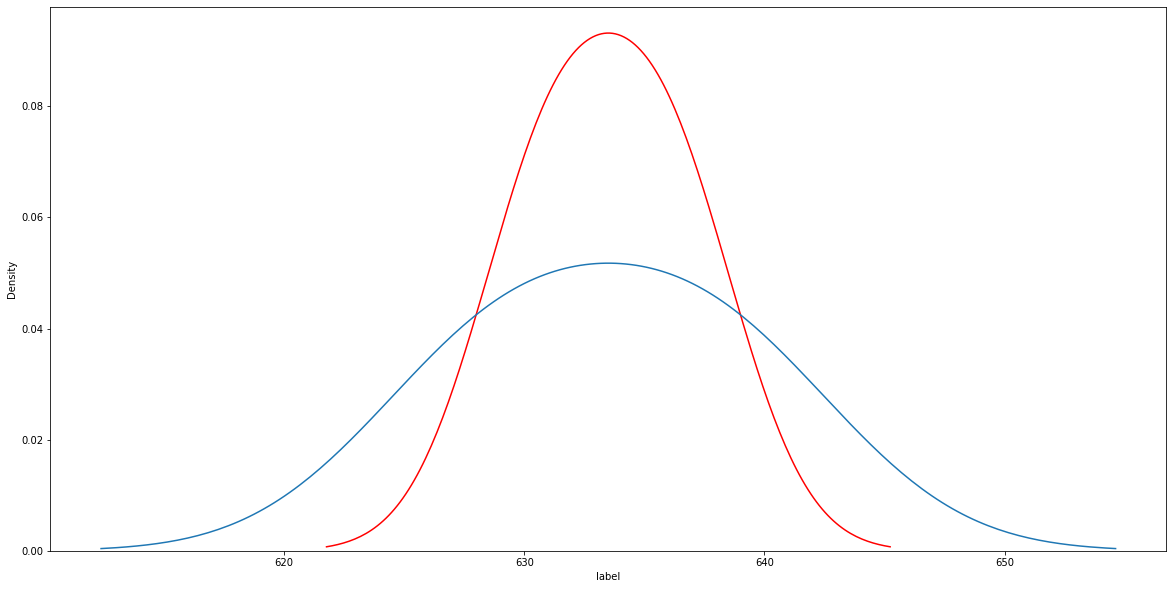

In [83]:
fig,ax = plt.subplots(figsize=(20,10))
sns.distplot(y_pred_Count , hist=False,color='red',ax = ax)
sns.distplot(y_true , hist=False,ax = ax)
plt.show()

In [43]:
real_wordC_df = pd.DataFrame(real_words)
fake_wordC_df = pd.DataFrame(fake_words)
real_wordC_df

,0
0,secretary
1,state
2,john
3,kerry
4,said
...,...
25554,comment
25555,fits
25556,closely
25557,campaign


In [44]:
fake_wordC_df 

,0
0,daniel
1,greenfield
2,shillman
3,journalism
4,fellow
...,...
12542,would
12543,look
12544,like
12545,barack


In [45]:
real_WordC = pd.DataFrame(real_wordC_df.value_counts(),)
real_WordC.rename(columns={ 0 : 'word', 0: 'count'},inplace = True)
real_WordC = real_WordC[:50]
real_WordC

['count']


,count
0,
said,281
trump,245
clinton,176
obama,137
state,129
new,125
isis,119
people,115
president,115


In [54]:
fake_WordC = pd.DataFrame(fake_wordC_df.value_counts())
fake_WordC.rename(columns={0: 'word', 0: 'count'}, inplace = True)
fake_WordC = fake_WordC[:50]
type(fake_WordC)

pandas.core.frame.DataFrame

In [19]:
import matplotlib.pyplot as plt

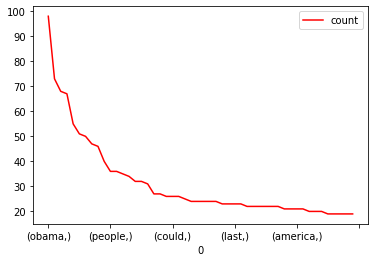

In [58]:
fake_WordC.plot(color='red')
plt.show()

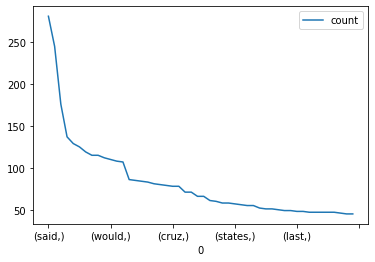

In [51]:
real_WordC.plot()
plt.show()

In [10]:
import pickle
with open('models/fake_news_detection_model.pkl','wb') as f:
    pickle.dump(pac, f)

In [11]:
with open('models/tfidf_vector.pkl','wb') as f:
    pickle.dump(tfidf_vectorizer,f)

In [3]:
from wordcloud import WordCloud

from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [4]:
df.shape
df2 = df.head(100).copy()

In [5]:
real_news = df2[df2['label']== 'REAL']['text']
fake_news = df2[df2['label']== 'FAKE']['text']

real_words = []
fake_words = []

def extract_real_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    real_words.extend(words)

def extract_fake_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    fake_words.extend(words)

real_news.apply(extract_real_words)
fake_news.apply(extract_fake_words)

0     None
1     None
3     None
5     None
6     None
12    None
13    None
16    None
17    None
21    None
24    None
29    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
42    None
43    None
45    None
48    None
49    None
52    None
53    None
54    None
56    None
58    None
60    None
63    None
69    None
71    None
74    None
78    None
79    None
83    None
91    None
92    None
95    None
96    None
Name: text, dtype: object

In [6]:
real_news

2     U.S. Secretary of State John F. Kerry said Mon...
4     It's primary day in New York and front-runners...
7     A Czech stockbroker who saved more than 650 Je...
8     Hillary Clinton and Donald Trump made some ina...
9     Iranian negotiators reportedly have made a las...
10    CEDAR RAPIDS, Iowa — “I had one of the most wo...
11    Donald Trump’s organizational problems have go...
14    Killing Obama administration rules, dismantlin...
15    As more women move into high offices, they oft...
18    Washington (CNN) For months, the White House a...
19    While paging through Pew's best data visualiza...
20    With little fanfare this fall, the New York de...
22    Hillary Clinton told a Staten Island crowd tod...
23    Mitch McConnell has an unusual admonition for ...
25    Washington (CNN) The faction of the GOP that i...
26    Meanwhile, Democrat Bernie Sanders picked up m...
27    After a week of nonstop criticism from Democra...
28    If you want a glimpse into a presidential 

In [89]:
text = " ".join(real_words)
wordcloud = WordCloud().generate(text)

In [90]:
import matplotlib.pyplot as plt

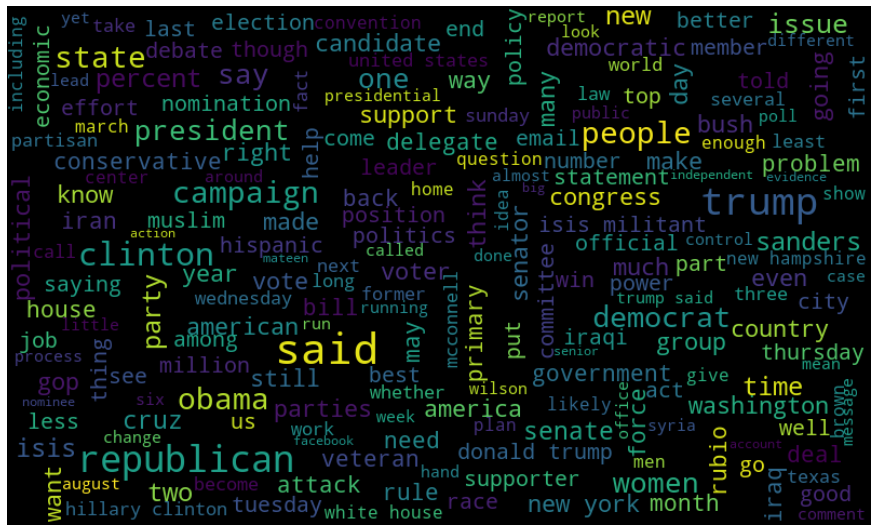

In [91]:
wordcloud = WordCloud(max_font_size=40,width = 800, height=480).generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()